In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('arxiv_data_210930-054931.csv')

In [6]:
df.head(8)

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...
5,"['cs.LG', 'stat.ML']",Lifelong Graph Learning,Graph neural networks (GNNs) are powerful mode...
6,['cs.LG'],Bayesian graph convolutional neural networks v...,"Deep learning models, such as convolutional ne..."
7,"['cs.LG', 'stat.ML']",Understanding and Resolving Performance Degrad...,A Graph Convolutional Network (GCN) stacks sev...


In [7]:
df.tail(5)

,terms,titles,abstracts
56176,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...
56177,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...
56178,['cs.LG'],Deep Reinforcement Learning with Double Q-lear...,The popular Q-learning algorithm is known to o...
56179,"['stat.ML', 'cs.LG', 'math.OC']",Generalized Low Rank Models,Principal components analysis (PCA) is a well-...
56180,"['cs.LG', 'cs.AI', 'stat.ML']",Chi-square Tests Driven Method for Learning th...,SDYNA is a general framework designed to addre...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56181 entries, 0 to 56180
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   terms      56181 non-null  object
 1   titles     56181 non-null  object
 2   abstracts  56181 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [9]:
df.shape

(56181, 3)

In [10]:
pd.DataFrame(df.terms.unique()).values

array([["['cs.LG']"],
       ["['cs.LG', 'cs.AI']"],
       ["['cs.LG', 'cs.CR', 'stat.ML']"],
       ...,
       ["['cs.LG', 'cs.AI', 'math.PR']"],
       ["['cs.LG', 'stat.ME', 'stat.ML', 'I.2.0; G.3']"],
       ["['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']"]], dtype=object)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [15]:
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.preprocessing import normalize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rakshitram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque

[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package pil to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |  

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/rakshitram/nltk_data...
[nltk_data]    |   P

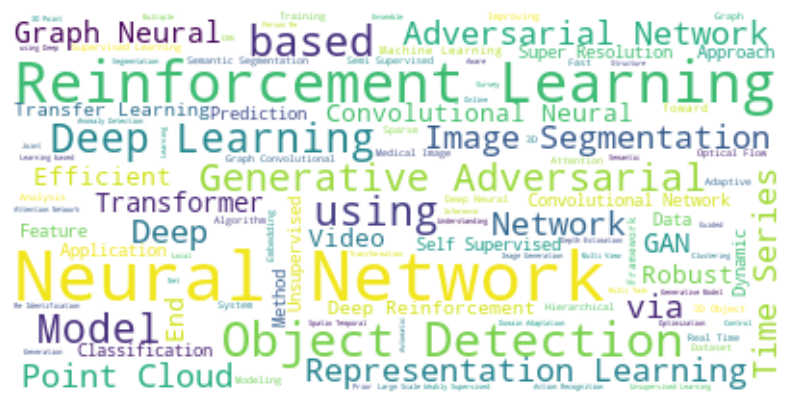

In [16]:
nltk.download('stopwords')
nltk.download('all')
stop_words = set(stopwords.words('english'))
text = ' '.join(review for review in df['titles'])
text = ' '.join([word for word in text.split() if word not in stop_words])
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [17]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

In [18]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_train = tfidf_vectorizer.fit_transform(train_df['titles']).toarray()
tfidf_test = tfidf_vectorizer.transform(test_df['titles']).toarray()

In [19]:
word2vec_model = Word2Vec(sentences=train_df['titles'].apply(preprocess_text), vector_size=100, window=5, min_count=1, workers=4)

def average_word2vec(tokens, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in model.wv:
            n_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector


w2v_train = np.array([average_word2vec(preprocess_text(text), word2vec_model, 100) for text in train_df['titles']])
w2v_test = np.array([average_word2vec(preprocess_text(text), word2vec_model, 100) for text in test_df['titles']])

In [20]:
w2v_train = normalize(w2v_train)
w2v_test = normalize(w2v_test)

In [21]:
X_train = np.concatenate([tfidf_train, w2v_train], axis=1)
X_test = np.concatenate([tfidf_test, w2v_test], axis=1)

y_train = train_df[['terms']]
y_test = test_df['terms']

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44944, 1100)
(44944, 1)
(11237, 1100)
(11237,)


In [23]:
from sklearn.pipeline import FeatureUnion
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
nb_model = MultinomialNB()
nb_model.fit(X_train_scaled, y_train)
nb_predictions = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_predictions)

/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
print("Multinomial Accuracy Score is: {}%".format(round(nb_accuracy*100,2)))

Multinomial Accuracy Score is: 39.42%


In [27]:
print("\nMultinomialNB Classification Report:")
print(classification_report(y_test, nb_predictions))


MultinomialNB Classification Report:


/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                                                                      precision    recall  f1-score   support

                                                                                                          ['cs.CV', '03B52, 94A08', 'I.4.8; I.4.10']       0.00      0.00      0.00         1
                                                                                                             ['cs.CV', '05B45, 62H30, 54E05, 68T10']       0.00      0.00      0.00         2
                                                                                                                                  ['cs.CV', '26A33']       0.00      0.00      0.00         1
                                                                                                                    ['cs.CV', '62H35, 68U10, 94A08']       0.00      0.00      0.00         1
                                                 

/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)

/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print("Logistic Regression Accuracy Score is: {}%".format(round(lr_accuracy*100,2)))

Logistic Regression Accuracy Score is: 39.6%


In [30]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))


Logistic Regression Classification Report:
                                                                                                                                                      precision    recall  f1-score   support

                                                                                                          ['cs.CV', '03B52, 94A08', 'I.4.8; I.4.10']       0.00      0.00      0.00         1
                                                                                                             ['cs.CV', '05B45, 62H30, 54E05, 68T10']       0.00      0.00      0.00         2
                                                                                                                                  ['cs.CV', '26A33']       0.00      0.00      0.00         1
                                                                                                                    ['cs.CV', '62H35, 68U10, 94A08']       0.00      0.00      0.00         1
     

/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#print("Random Forest Accuracy Score is: {}%".format(round(rf_accuracy*100,2)))

In [34]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
print("SVM Score is: {}%".format(round(svm_accuracy*100,2)))

SVM Score is: 39.49%


In [36]:
print("\nSVM Accuracy Classification Report:")
print(classification_report(y_test, svm_predictions))


SVM Accuracy Classification Report:
                                                                                                                                                      precision    recall  f1-score   support

                                                                                                          ['cs.CV', '03B52, 94A08', 'I.4.8; I.4.10']       0.00      0.00      0.00         1
                                                                                                             ['cs.CV', '05B45, 62H30, 54E05, 68T10']       0.00      0.00      0.00         2
                                                                                                                                  ['cs.CV', '26A33']       0.00      0.00      0.00         1
                                                                                                                    ['cs.CV', '62H35, 68U10, 94A08']       0.00      0.00      0.00         1
            

/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rakshitram/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
